# Recommending ingredients using restricted Boltzmann machines

The most well-known applications of artificial neural networks is into supervised learning. Using a trainable non-linear expansion of the features, they can be used to classify images, identify odors identify genes and many other things.

In contrast to supervised learning, which learns to map input to output, unsupervised learning deals with general patterns in data. It could be argued (and has been!) that the latter is the more challenging task, as it is fairly straightforward how to fit a function to labeled training data, while there is no obvious thing to optimize for finding patterns. Though in general, unsupervised learning is somewhat less well understood, it is likely the key to better AI applications, as in general we have much more unlabeled data to learn from compared to labeled data.

In this post, we will discuss the restricted Bolzmann machine (RBM) as a way of fitting a distribution of a complex dataset. Like many unsupervised methods, RBMs are probabilistic models that make use of latent variables. This means that our visible data $\mathbf{v}$ is explained in terms to some unobserved hidden variables $\mathbf{h}$. The way how the hidden variables are linked to the visibele variables should give us some insight in how the data might be generated.

By means of an application, we will train a RBM on the recipe data of Ahn et al. to learn the distribution of recipes. This will allow us to find new ingredient combinations and create novel recipes.

## The restricted Boltzmann machine

Suppose we have binary data vectors $\mathbf{v} = [v_i]$, which could represent a (binary) image, preference for certain movies, presence or absence of ingredients in a recpipe... Futhermore, we have binary hidden variabeles $\mathbf{h} = [h_i]$ which should explain these observed data vectors. These we have to learnt from the data. In this post we will only consider binary data, making generalization to interger or real values is relatively straightforward. 

The degree to which a pair $(\mathbf{v}, \mathbf{h})$ match is given by their energy $E(\mathbf{v}, \mathbf{h})$, dyads that are likely are more favorable. This can be quantified probabilistically using the Boltzmann distribution:

$$
\mathcal{P}(\mathbf{v}, \mathbf{h}) = \frac{1}{Z}e^{-E(\mathbf{v}, \mathbf{h})}\,,
$$
with $Z$ the partition function to make this distribution normalized
$$
Z = \sum_\mathbf{v} \sum_\mathbf{h}e^{-E(\mathbf{v}, \mathbf{h})}\,.
$$
Unfortunately, to calculate this partition function (and hence calculate probabilities), we have to calculate a sum over a combinatorial large space! ...

* beschrijving data 
* uitleg RMB
* leerregels

## Example: bars and stripes
* voorbeeldje uitleggen en tonen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd
from RestrictedBoltzmannMachine import RestrictedBoltzmannMachine

In [2]:
def make_bars_and_stripes(size=(10,10)):
    # makes a sample dataset
    direction = rd.choice([0, 1])
    if direction == 0:
        M = np.kron(np.random.binomial(1, 0.5, size=(size[0], 1)), np.ones((1, size[1])))
    else:
        M = np.kron(np.ones((size[0], 1)), np.random.binomial(1, 0.5, size=(1, size[1])))
    return M.reshape((1, -1))
    
def show(vector, size=(10, 10)):
    matrix = vector.reshape(size)
    plt.imshow(matrix, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def noise(vector, fraction=0.025):
    # randomly flips a certain fraction of bits
    return (vector + np.random.binomial(1, fraction, size=vector.size)) % 2

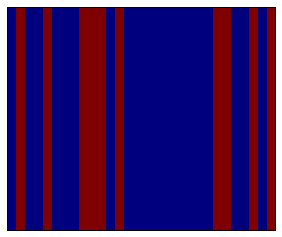

In [3]:
size = (25, 30)
M = make_bars_and_stripes(size)
show(M, size)

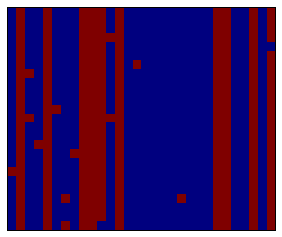

In [4]:
M_noisy = noise(M)
show(M_noisy, size)

In [5]:
dataset = np.concatenate([noise(make_bars_and_stripes(), 0) for i in range(1000)], axis=0)

In [6]:
rbm = RestrictedBoltzmannMachine(n_visible=100, n_hidden=100)

In [7]:
error = rbm.train_C1(dataset, 0.01, iterations=1000)

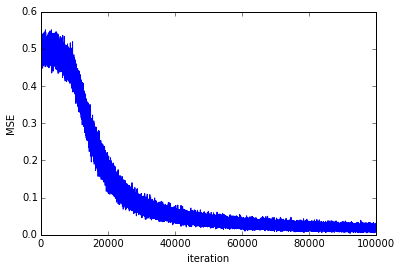

In [8]:
plt.plot(error)
plt.xlabel('iteration')
plt.ylabel('MSE')

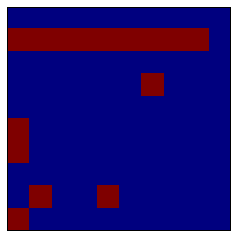

In [14]:
instance = noise(make_bars_and_stripes(), 0.05)
show(instance)

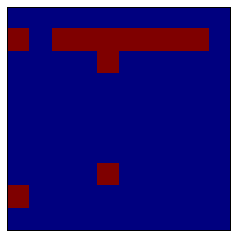

In [15]:
reconstruction = rbm.reconstruct(instance)
show(reconstruction)

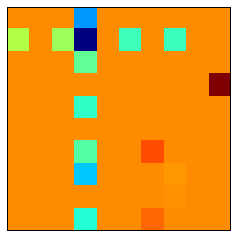

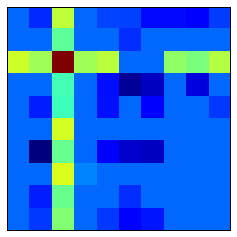

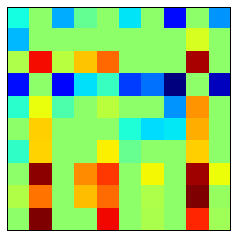

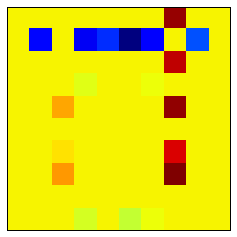

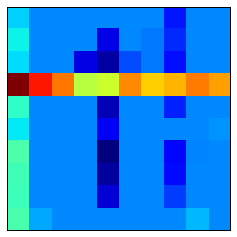

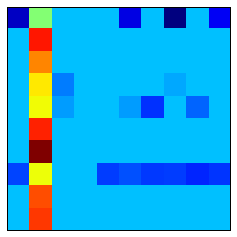

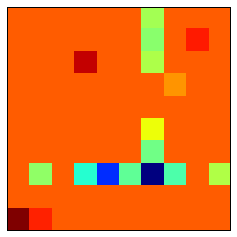

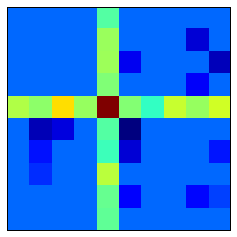

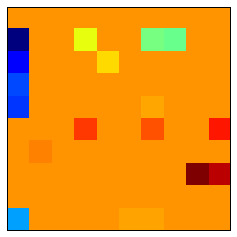

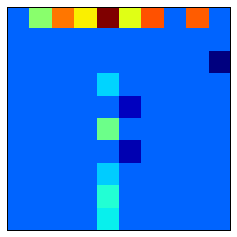

In [11]:
for i in range(10):
    show(rbm._weights[:, i])

## Thoughts for Food: a recipe restricted Boltzmann machine